# Chapter 3: Getting started with neural networks

## 3.1 Anatomy of a neural network

Notes:
- Layers, which are combined into a network (or model)
- The input data and corresponding targets
- The loss function, which defines the feedback signal used for learning
- The optimizer, which determines how learning proceeds.
- <img src="./images/keras_01.png" width=600px>
- Remember, that layers are important to neural network
    - Layers are vectors of the weights: Some layers are stateless, but more frequently layers have a state: the layer’s weights, one or several tensors learned with stochastic gradient descent, which together contain the network’s knowledge.


### 3.1.1 Layers: the building blocks of deep learning
- Type of layers for different tensor formats/different type of data processing
     - For instance, simple vector data, stored in 2D tensors of shape (samples, features), is often processed by densely connected layers, also called fully connected or dense layers (the Dense class in Keras).
     - Sequence data, stored in 3D tensors of shape (samples, timesteps, features), is typically processed by recurrent layers such as an LSTM layer.
     - Image data, stored in 4D tensors, is usually processed by 2D convolution layers (Conv2D).


In [1]:
# from keras import layers
# layer = layers.Dense(32, input_shape=(784,))

### 3.1.2 Models: networks of layers
- We’re creating a layer that will only accept as input 2D tensors where the first dimension is 784 (axis 0, the batch dimension, is unspecified, and thus any value would be accepted).
- The code above looks will output a tensor where the first dimension has been transformed to be 32.
- A deep-learning model is a directed, acyclic graph of layers. The most common instance is a linear stack of layers, mapping a single input to a single output.
- There are spaces (constraints) that are data lives within. E.g:
    - Two-branch networks
    - Multihead networks
    - Inception blocks

### 3.1.3 Loss functions and optimizers: keys to configuring the learning process
- Loss function (objective function)—The quantity that will be minimized during training. It represents a measure of success for the task at hand.
- Optimizer—Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).

## 3.2 Introduction to Keras

### 3.2.2 Developing with Keras: a quick overview
- 1. Define your training data: input tensors and target tensors.
- 2. Define a network of layers (or model ) that maps your inputs to your targets.
- 3. Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor.
- 4. Iterate on your training data by calling the fit() method of your model.
- We must define the structure of the keras network. We could either use the functional API function or the Sequential library within Keras.
- Finally, the learning process consists of passing Numpy arrays of input data (and the corresponding target data) to the model via the fit() method, similar to what you would do in Scikit-Learn and several other machine-learning libraries

## 3.3 Setting up a deep-learning workstation

## 3.4 Classifying movie reviews: a binary classification example

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# We add num_words for the top popular num_words... do not want to have a unmanagebale dataset

/Users/alexguanga/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Each instance in the training data is a review with word indices (encoding a sequence of words)
# The train_labels tells whether or not the review was positive or negative
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
# The max num of words will be 99999, our constraint
# List comphrension where we find the largest instance of each row
max([max(sequence) for sequence in train_data])

9999

In [5]:
# The following will revert the word back to english
word_index = imdb.get_word_index()

# Reverses the structure of the key, value mapping it back to the words
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

# Decoding the message
# Note that the indices are offset by 3 because 0, 1, and 2 are
# reserved indices for “padding,” “start of sequence,” and “unknown.”
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
# We need to fix the vector of integer into a tensors
# There are two methods, the more complicated method will be shown later in the textbook
# We are creating a matrix where the sequences represents the vector of words in each row
# and the dimension is the total number of rows
# we create a 1 if the word is in the vector

# One thing to note is that it is important to have decimals even for integers...

import numpy as np
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
x_train.shape

(25000, 10000)

In [10]:
# We also need to vectorize the test set
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [12]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

### 3.4.3 Building your network
When we have vectors and output labels (that are decoded) as 0 and 1, we can represent these type of algos as a "dense" function from the keras library

The hidden unit is each of the nodes that make up the layer

There are two key architecture decisions to be made about such a stack of Dense layers:
- How many layers to use
- How many hidden units to choose for each layer

While the concept of the layter can be changed, the author suggest the following. We will eventually have to change the way the data is structure (but lets use the following) as a framework:
- Two intermediate layers with 16 hidden units each
- A third layer that will output the scalar prediction regarding the sentiment of
the current review

Two of the most popular models are the relu and logsitic function. The relu model will be used when we are looking at  the hidden layers. The hidden layers will help us find the activation we need, and the relu function can only be in the range btw positive values, it eliminates the nagtive values. Moreover, the logistic regression will take any value and the range will be btw 0 and 1.

Another thing to keep in mind is how we should identify the loss function and optimizer. 
- It isn’t the only viable choice: you could use, for instance, mean_squared_error. But crossentropy is usually the best choice when you’re dealing with models that output probabilities. Crossentropy is a quantity from the field of Information Theory that measures the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Including the loss function/optimizer
# model.compile(optimizer='rmsprop',
# loss='binary_crossentropy',
# metrics=['accuracy'])

# Another implemention of the loss function/optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 3.4.4 Validating your approach
One of the best way to conduct the trinaing and testing set is to inlcude the crossvalidation into the problem.

Notes:
- But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch.

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 307us/step - loss: 0.5083 - acc: 0.7823 - val_loss: 0.3787 - val_acc: 0.8689
Epoch 2/20
15000/15000 [==============================] - 3s 207us/step - loss: 0.3001 - acc: 0.9047 - val_loss: 0.3001 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.2178 - acc: 0.9282 - val_loss: 0.3083 - val_acc: 0.8717
Epoch 4/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 3s 174us/step - loss: 0.1425 - acc: 0.9545 - val_loss: 0.2843 - val_acc: 0.8874
Epoch 6/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3170 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.0980 - acc: 0.9708 - val_loss: 0.3127 - 

In [15]:
# If we can the history object, we find that is dictionary that contains certains key, values
history_dict = history.history
history_dict.keys() # output: [u'acc', u'loss', u'val_acc', u'val_loss']

# Plotting the training and testing loss
import matplotlib.pyplot as plt
acc = history_dict['acc']
loss_values = history_dict['loss']
val_acc = history_dict['val_acc']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

# Plotting the training and testing accuracy
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [16]:
# Noticed that in the graphs above, we see the total num of epoch should be around 3 or 4. After 4, 
# the performance of testing set suffers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

# lets evaluare the result 
results = model.evaluate(x_test, y_test)

# if we need the actual prediction of each of the cases...
model.predict(x_test)

Epoch 1/4
25000/25000 [==============================] - 3s 107us/step - loss: 0.4749 - acc: 0.8216
Epoch 2/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.2654 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 2s 88us/step - loss: 0.1983 - acc: 0.9301
Epoch 4/4
25000/25000 [==============================] - 4s 156us/step


array([[0.13788043],
       [0.99969196],
       [0.2989973 ],
       ...,
       [0.07207676],
       [0.04376046],
       [0.46998248]], dtype=float32)

In [17]:
x_train.shape

(25000, 10000)

In [18]:
import pickle
pickle.dump(x_train, open("x_train.p", "wb"))
#pickle.dump(x_test, open("x_test.p", "wb"))
#pickle.dump(y_train, open("y_train.p", "wb"))
#pickle.dump(y_test, open("y_test.p", "wb"))

In [19]:
x_train = pickle.load(open( "x_train.p", "rb" ) )
x_train.shape

(25000, 10000)

### 3.4.6 Further experiments
The following experiments will help convince you that the architecture choices you’ve made are all fairly reasonable, although there’s still room for improvement:
- You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.
- Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.
- Try using the mse loss function instead of binary_crossentropy.
- Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

### 3.4.7 Wrapping up
Here’s what you should take away from this example:
- You usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it—as tensors—into a neural network. Sequences of words can be encoded as binary vectors, but there are other encoding options, too.
- Stacks of Dense layers with relu activations can solve a wide range of problems (including sentiment classification), and you’ll likely use them frequently.
- In a binary classification problem (two output classes), your network should end with a Dense layer with one unit and a sigmoid activation: the output of your network should be a scalar between 0 and 1, encoding a probability.
- With such a scalar sigmoid output on a binary classification problem, the loss function you should use is binary_crossentropy.
- The rmsprop optimizer is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about.
- As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they’ve never seen before. Be sure

## 3.5 Classifying newswires: a multiclass classification example
- When dealing with problems that are more than one label, the following are possibilities...
    - Because you have many classes, this problem is an instance of multiclass classification; and because each data point should be classified into only one category, the problem is more specifically an instance of **single-label, multiclass classification.**
    - If each data point could belong to multiple categories (in this case, topics), you’d be facing a **multilabel, multiclass classification problem.**

In [20]:
# Loading the reuters dataset
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [21]:
# Total # of training and testing examples
print(len(train_data), len(test_data))

8982 2246


In [22]:
# Each example is a list of integers (word indices):
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [23]:
# Decoding the index to words
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
                             train_data[0]]) # Only for the first example



In [24]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Vectorizing the training/testing data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [25]:
# Unlike in the previous function, we will now use the hot-one encoding to vectorize the labels
# 46 represents the categories possible
def to_one_hot(labels, dimensions=46):
    results = np.zeros((len(labels), dimensions))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [26]:
# As an alternative, Keras has the following function

# from keras.utils.np_utils import to_categorical
# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

### 3.5.3 Building your network
- This topic-classification problem looks similar to the previous movie-review classification problem: 
    - in both cases, you’re trying to classify short snippets of text. But there is a new constraint here: the number of output classes has gone from 2 to 46.

In [27]:
# We need more nodes in each of the layers, there are more possible outcomes
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# softmax assigns a prob to each of the output where the total shall be 1
# Loss function: The best loss function to use in this case is categorical_crossentropy. 
# It measures the distance between two probability distributions: here, between the probability distribution
# output by the network and the true distribution of the labels. 
model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Validating the approach
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Training the model 
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 194us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 116us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 122us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1709 - val_acc: 0.7440
Epoch 4/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.8697 - acc: 0.8162 - val_loss: 1.0784 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 143us/step - loss: 0.7033 - acc: 0.8470 - val_loss: 0.9843 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 140us/step - loss: 0.5665 - acc: 0.8804 - val_loss: 0.9414 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.4581 - acc: 0.9045 - val_loss: 0.9069 - val_acc: 0.8020


** Reiminder: The val_loss is the loss function done on the validation set while the losss function is the loss on the training set**

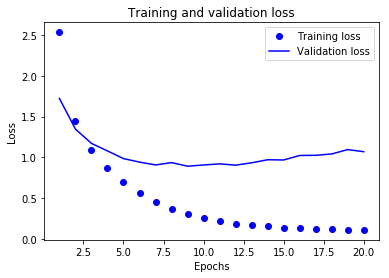

In [28]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

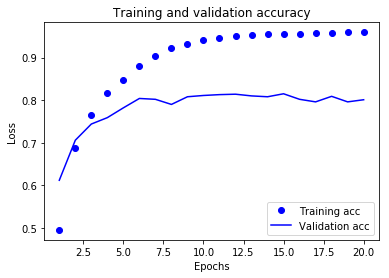

In [29]:
# Plotting the training and validation accuracy
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

- We see that the network begins to overfit after nine epochs. Let’s train a new network from scratch for nine epochs and then evaluate it on the test set.

In [30]:
# Retraining the model with 9 epochs
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 162us/step - loss: 2.5391 - acc: 0.5227 - val_loss: 1.6724 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 124us/step - loss: 1.3694 - acc: 0.7127 - val_loss: 1.2745 - val_acc: 0.7200
Epoch 3/9
7982/7982 [==============================] - 1s 141us/step - loss: 1.0131 - acc: 0.7791 - val_loss: 1.1302 - val_acc: 0.7520
Epoch 4/9
7982/7982 [==============================] - 1s 118us/step - loss: 0.7978 - acc: 0.8245 - val_loss: 1.0523 - val_acc: 0.7600
Epoch 5/9
7982/7982 [==============================] - 1s 128us/step - loss: 0.6397 - acc: 0.8632 - val_loss: 0.9735 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 1s 120us/step - loss: 0.5125 - acc: 0.8919 - val_loss: 0.9104 - val_acc: 0.8110
Epoch 7/9
7982/7982 [==============================] - 1s 119us/step - loss: 0.4123 - acc: 0.9148 - val_loss: 0.8936 - val_acc: 0.8210
Epoch 8

In [31]:
# A good baseline is to randomly assign values
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

In [32]:
# What if want to find the result on testing set?
predictions = model.predict(x_test)

# Remember: each of the entry is a prediction. If we look at the first example...
# we realized that the shape is a vector of 46, indicating that we will give a prob.
# to each of the possible outcomes (it adds to 1)
predictions[0].shape, np.sum(predictions[0])

((46,), 0.9999999)

In [33]:
# if we want the largest prob. btw all the classes, we could do the folliwing
np.argmax(predictions[0])

3

In [34]:
# 3.5.6 A different way to handle the labels and the loss
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# the difference is that we will incorporate labels as replacements...
# Replace categorical_crossentropy with sparse_categorical_crossentropy
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# We should stray out away from not hvaing enough nodes in a complex model

In [36]:
# 3.5.8 Further experiments
# - Try using larger or smaller layers: 32 units, 128 units, and so on.
# - You used two hidden layers. Now try using a single hidden layer, or three hidden layers.

### 3.5.9 Wrapping up
- If you’re trying to classify data points among N classes, your network should end with a Dense layer of size N. Meaning, that we give of the possible outcomes a fair chance even if we might think they are not a probalt case
- In a single-label, multiclass classification problem, your network should end with a softmax activation so that it will output a probability distribution over the N output classes. 
- *Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network and the true distribution of the targets.*
- There are two ways to handle labels in multiclass classification:
    1. Encoding the labels via categorical encoding (also known as one-hot encoding) and using categorical_crossentropy as a loss function. One-hot-encoding is giving 1 and 0.
    2. Encoding the labels as integers and using the sparse_categorical_crossentropy loss function
- If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your network due to intermediate layers that are too small.

## 3.6 Predicting house prices: a regression example

In [37]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [38]:
# The shape of the training set
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [39]:
# Given the different scale of the variables, we have to normalize the data
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

** You should never use in your workflow any quantity computed on the test data, even for something as simple as data normalization.**

In [40]:
# 3.6.3 Building your network

# In general, the less training data you have, the worse overfitting
# will be, and using a small network is one way to mitigate overfitting.

# Thus, we create a small network with two hidden layers and 64 units

# Recall that we normalize the data, and a change of MAE .5 is equivalent to a 500 dollar difference

from keras import layers
from keras import models

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                          input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    
    # The final layer will ot have any activation, it is a linear problem, thus, we do not need to 
    # create any activation function
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [46]:
# K-fold validation
# The partial data will be used as the training set where we test on the val_data!

k = 4

# The total values that we will partitioned the data
num_val_samples = len(train_data)//k

num_epochs = 100
all_scores = []

for i in range(k):
    print("Processing fold: {0}".format(i))
    
    # Using the total # of values per each bucket for the validation set 
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_target = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    # Using the reminder of the data (will serve as the training set, what the algo will learned)
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    # We will build a model for each of the k-fold
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    
    # How we are scoring the validation set
    val_mse, val_mae = model.evaluate(val_data, val_target, verbose=0)
    
    # lastly, we will store the scoring value
    all_scores.append(val_mae)
    

Processing fold: 0
Processing fold: 1
Processing fold: 2
Processing fold: 3


In [47]:
all_scores, np.mean(all_scores)

# Reminders, the values are relatively small bc we normalized the data

# The difference is 3 which translates to 3000 dollar. Given that are dataset is btw 10K and 50K, 
# the difference is signficiant

([1.915696365998523, 2.79560919563369, 2.5082943628330043, 2.295379864107264],
 2.3787449471431206)

In [48]:
# Saving the validation log at each fold, meaning, we will have the validation 
# Increasing the num pf epoch to 500

# The difference btw the previous traiing and this is that in the prior
# we are extracting the model after it runs the 100 epochs
# In this one, we are evaulating the info. of each of the epoch (I believe so...)

num_epochs = 500
all_mae_history = []

for i in range(k):
    print("Processing fold: {0}".format(i))
    
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], 
                                         train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history['val_mean_absolute_error']    
    all_mae_history.append(mae_history)


Processing fold: 0
Processing fold: 1
Processing fold: 2
Processing fold: 3


In [50]:
# Building the succcesive mean of each score
average_mae_history = [
    np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]

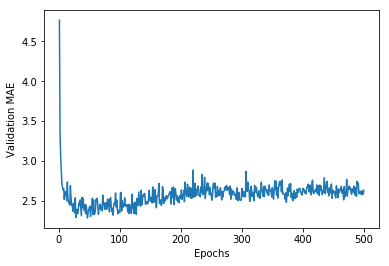

In [51]:
# Plotting the validation set

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [52]:
# Since the graph above is clunky, the author suggest 
# we remove the first 10 data points (not on the same scale, do not know why)
# and replace each point with an exponential moving average of the previous points to obtain a smooth curve.

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

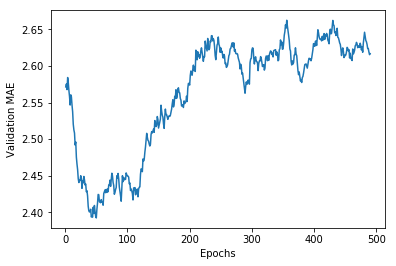

In [53]:
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [54]:
# Retraining the total set using all the data points
model = build_model()
model.fit(train_data, train_targets, epochs=80,
         batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

102/102 [==============================] - 0s 1ms/step


2.8116693683699068

**NOTES**
- We are still off by still by about $2,811.

### 3.6.5 Wrapping up
- Regressions have a different loss function than classification (MSE, RMSE are popular loss functions)
- Evaluation metrics to be used for regression differ from those used for classification; naturally, the concept of accuracy doesn’t apply for regression. A common regression metric is mean absolute error (MAE).
- Scaling the data is important. Or else, we could have values be represnted with a greater importance because it has a greater abs value
- When there is little data available, using K-fold validation is a great way to reliably evaluate a model.
- When little training data is available, it’s preferable to use a small network with few hidden layers (typically only one or two), in order to avoid severe overfitting.
- Notice how the evaluation metrics is different than the loss function. Interstinly enoigh, the evaluation metrics does not have to do with bettering the model. Only the loss function is being optimized to better fit the data.

### Chapter Summary:
- You’re now able to handle the most common kinds of machine-learning tasks on vector data: binary classification, multiclass classification, and scalar regression. The “Wrapping up” sections earlier in the chapter summarize the important points you’ve learned regarding these types of tasks.
- You’ll usually need to preprocess raw data before feeding it into a neural network.
- When your data has features with different ranges, scale each feature independently as part of preprocessing.
- As training progresses, neural networks eventually begin to overfit and obtain worse results on never-before-seen data.
- If you don’t have much training data, use a small network with only one or two hidden layers, to avoid severe overfitting.
- If your data is divided into many categories, you may cause information bottlenecks if you make the intermediate layers too small. Meaning, a lot of the information will be be pushed to be in a few neural networks if we do not have enough enough networks to learn the model.
- Regression uses different loss functions and different evaluation metrics than classification.
- When you’re working with little data, K-fold validation can help reliably evaluate your model.